<a href="https://colab.research.google.com/github/AllieUbisse/end-to-end-ml/blob/master/notebooks/iris_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Do You Start Machine Learning in Python?

**Beginners Need A Small End-to-End Project**
Books and courses are frustrating. They give you lots of recipes and snippets, but you never get to see how they all fit together.

When you are applying machine learning to your own datasets, you are working on a project.

A machine learning project may not be linear, but it has a number of well known steps:

- Define Problem [problem framing ]
- Prepare Data.
- Evaluate Algorithms.
- Improve Results.
- Present Results.

# Imports

In [7]:
# data manipulation
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix


# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

print('setup Complete')

setup Complete


# 2 Load Dataset

In [0]:
# load data
url2 = 'https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/iris.csv'
iris_df = pd.read_csv(url2)
iris_df.rename(columns={'species': 'class'}, inplace=True)

# 3. Summarize the Dataset
Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

- Dimensions of the dataset.
- info of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.



In [117]:
# dimension
iris_df.shape

(150, 5)

In [118]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
# quick info about data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [120]:
 # statistical summary for each attribute
 iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [121]:
# group by target and check the distribution of outcomes
iris_df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# 4. EDA ( Data Visualization )
> We are going to look at two types of plots:

- **Univariate plots** to better understand each attribute.
- **Multivariate plots** to better understand the relationships between attributes.



## Univariate plots

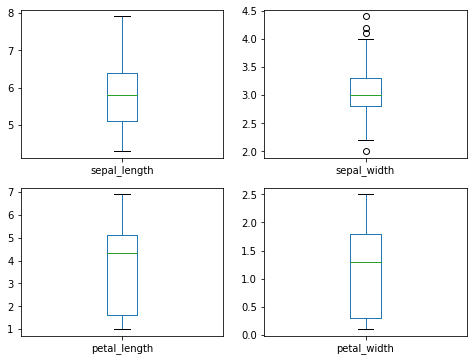

In [36]:
# univariate plots using box plot since we have numeric features
iris_df.plot(kind='box',
             subplots=True, 
             sharex=False, sharey=False, 
             layout=(2,2),
             figsize=(8,6))

plt.show()

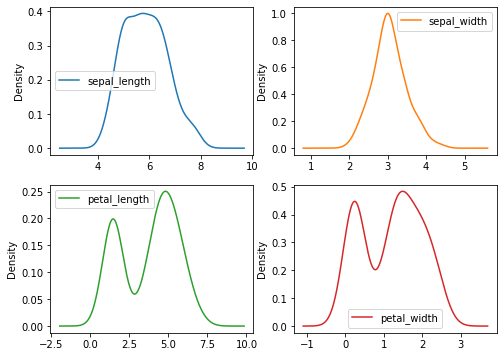

In [41]:
# histogram 
iris_df.plot(kind='kde',
             subplots=True,
             sharex=False, sharey=False,
             layout=(2,2),
             figsize=(8,6))

plt.show()

sepal width and sepal length have a gaussian dist. this may come in handy late when modeling.

## Multivariate Plots
Now we can look at the interactions between the variables AKA **correlation**

In [50]:
corr_matrix = iris_df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


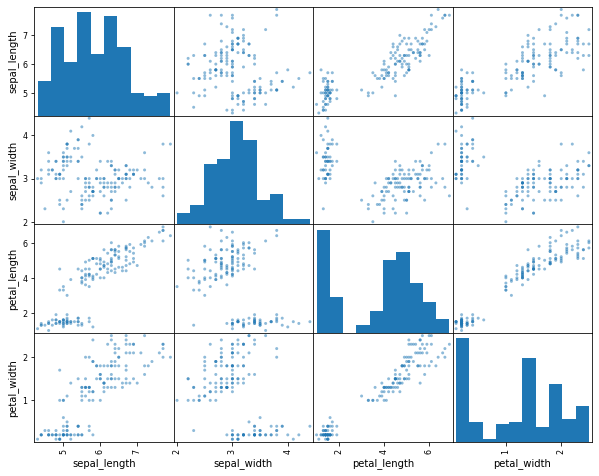

In [46]:
scatter_matrix(iris_df, figsize=(10,8) )
plt.show()

report:
> petal_width is highly correlated with petal_length with corr = 0.962757

# 5. Evaluate  Algorithms

> Here is what we are going to cover in this step:

- Separate out a validation dataset.
- Set-up the test harness to use 10-fold cross validation.
- Build multiple different models to predict species from flower measurements
- Select the best model.

**NOTE:** **petal_width** is founded to be **highly correlated** with **petal_length**, so we **drop one**, in our case is **petal_width**

```python3
 X = iris_df.drop(['class','petal_width'], axis=1)
```

In [162]:
# separate the label from the features
X = iris_df.drop(['class'], axis=1)
y= iris_df['class']

# split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# show size of new subsets
X_train.shape, X_test.shape

((120, 4), (30, 4))

## Test Harness
**We will use stratified 10-fold cross validation to estimate model accuracy.**

> This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

> Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

**We are using the metric of ‘accuracy‘ to evaluate models.**

> This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). 
```python
( (correctly predicted instances) / (total number of instances in the dataset) )* 100 = accuracy %
```
> We will be using the scoring variable when we run build and evaluate each model next.

## Build Models

We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

**Let’s test 6 different algorithms:**

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [0]:
# defining models to a list for easy evaluation
models = list()

models.append(('LR', 
               LogisticRegression(solver='liblinear', multi_class='ovr'))
              )

models.append(('LDA',
               LinearDiscriminantAnalysis()))

models.append(('KNN',
               KNeighborsClassifier()))

models.append(('CART',
               DecisionTreeClassifier()))

models.append(('NB',
               GaussianNB()))

models.append(('SVM',
               SVC(gamma='auto')))


In [164]:
# evaluate the models
results = list()
names = list()

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    results.append(cv_results)
    names.append(name)

    print(f'{name}:\nmean accuracy: {cv_results.mean()} \nstd accuracy: {cv_results.std()}\n-------------------')

LR:
mean accuracy: 0.9416666666666667 
std accuracy: 0.06508541396588878
-------------------
LDA:
mean accuracy: 0.975 
std accuracy: 0.03818813079129868
-------------------
KNN:
mean accuracy: 0.9583333333333333 
std accuracy: 0.04166666666666669
-------------------
CART:
mean accuracy: 0.9499999999999998 
std accuracy: 0.04082482904638632
-------------------
NB:
mean accuracy: 0.95 
std accuracy: 0.05527707983925667
-------------------
SVM:
mean accuracy: 0.9833333333333332 
std accuracy: 0.03333333333333335
-------------------


# Select model

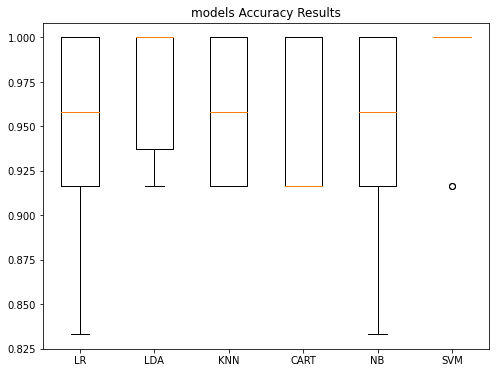

In [165]:
# ploting models accuracy results using boxplot
plt.figure(figsize= (8,6))
plt.boxplot(x=results,  labels=names)
plt.title('models Accuracy Results')
plt.show()

SVC and LDA have 98% accuracy.


# 6 Final Model (Make Predictions)
> SVC with 98% mean accuracy

In [0]:
# define the SVC instance 
final_model = SVC(gamma='auto')

# fit the model with the full train data
final_model.fit(X_train, y_train)

# predict using the test data
y_pred = final_model.predict(X_test)

## Evaluate Predictions

We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.

In [167]:
# print the accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred)*100)

# print the confusion matrix
print('--------------------------\nconfusion matrix:\n', confusion_matrix(y_test, y_pred))

# print the classification Report
print('--------------------------\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy score: 96.66666666666667
--------------------------
confusion matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
--------------------------
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Train Score: 98.3%
Test Score : 96.3%

> **Overfiting** 
- The model is a bit overfiting, meaning it **fits well** the **training data** but failed to **generalize** on **new data**.


> **why**?
- The model learnt not only the right patterns but also some noise.

> **What do you mean**?
- In our case we had two features that were highly correlated (petal_width and petal_length with corr = 96%) AKA **multicolinearity**

> **Let's Slove this problem**!
- Drop either **petal_width** or **petal_length**.

> **why**?
- since they are doing the same taske and having then both causes noise.

In [169]:
# drop petal_wigth
X_train_reduced = X_train.drop('petal_width', axis=1)
X_test_reduced = X_test.drop('petal_width', axis=1)

# lets check the data
X_train_reduced.head(3)

,sepal_length,sepal_width,petal_length
91,6.1,3.0,4.6
135,7.7,3.0,6.1
69,5.6,2.5,3.9


we wont retrain all the models. but its best practice!
I've previously done that and i just want to minimize the code.

**lets shoot to our final model**

In [0]:

# define the SVC instance 
final_model = SVC(gamma='auto')

# fit the model with the full train data
final_model.fit(X_train_reduced, y_train)

# predict using the test data
y_pred = final_model.predict(X_test_reduced)

In [171]:
# print the accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred)*100)

# print the confusion matrix
print('--------------------------\nconfusion matrix:\n', confusion_matrix(y_test, y_pred))

# print the classification Report
print('--------------------------\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy score: 100.0
--------------------------
confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
--------------------------
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Your Next Step


- Work through the above tutorial with understanding.
- Read more about each step, this will help you gain interest and fill-in the ?????? marks
- Search for new projects. 
- find Datasets @[uci](https://archive.ics.uci.edu/ml/index.php)